In [1]:
import matplotlib.pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
from scipy import signal
from urllib import urlopen
from zipfile import ZipFile
from StringIO import StringIO
%matplotlib inline

#Loading citibike data.
url = urlopen("https://s3.amazonaws.com/tripdata/201606-citibike-tripdata.zip").read()
unzip = ZipFile(StringIO(url))
data =  unzip.open('201606-citibike-tripdata.csv')
df = pd.read_csv(data)
df.head()

#df = pd.read_csv("/Users/JordanVani/Documents/NYU/PUI/PUI2016_jmv423/HW4_jmv423/201606-citibike-tripdata.csv")

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


# Distribution of Age for Male & Female Riders
#### Question: Are the distribution of ages for male and female citibike riders the same?

In [2]:
df1 = df[['starttime', 'gender', 'birth year']].copy()
df1 = df1.rename(columns = {'birth year' : 'birthyear'})
df1['age'] = 2016 - df1.birthyear
df1.dropna(0, 'any', inplace = True)
df1.starttime = pd.to_datetime(df1.starttime, infer_datetime_format = True)
male = df1.query('gender == 1')
female = df1.query('gender == 2')
df1.head()

,starttime,gender,birthyear,age
0,2016-06-01 00:00:18,1,1972.0,44.0
1,2016-06-01 00:00:20,1,1967.0,49.0
2,2016-06-01 00:00:21,1,1989.0,27.0
3,2016-06-01 00:00:28,1,1991.0,25.0
4,2016-06-01 00:00:53,1,1989.0,27.0


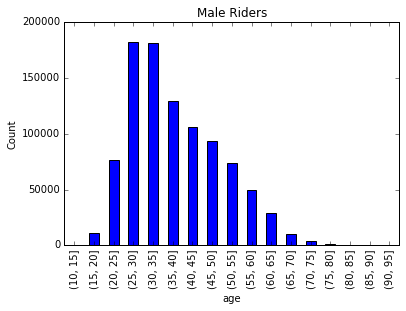

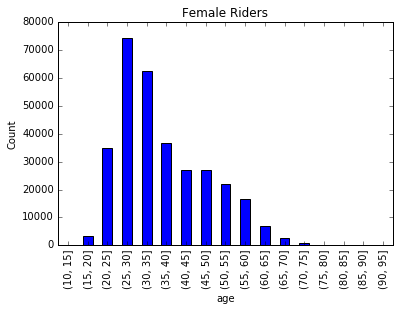

In [3]:
bins = np.arange(10, 99, 5)

axM = male.age.groupby(pd.cut(male.age, bins)).agg({"age" : np.count_nonzero}).plot(kind='bar', legend=False)
axM.set_title("Male Riders")
axM.set_ylabel('Count')


axF = female.age.groupby(pd.cut(female.age, bins)).agg({"age" : np.count_nonzero}).plot(kind='bar',legend=False)
axF.set_title("Female Riders")
axF.set_ylabel('Count')

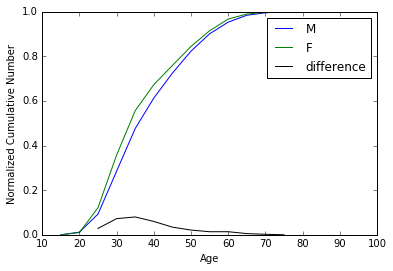

In [4]:
csM=male.age.groupby(pd.cut(male.age, bins)).agg({"age" : np.count_nonzero}).cumsum()
csF=female.age.groupby(pd.cut(female.age, bins)).agg({"age" : np.count_nonzero}).cumsum()

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

### KS Test

$H_o$: There is no difference between the age distributions of male and female citibike riders (significance at p=0.05). 

$H_a$: There is a difference between the age distributions of male and female citibike riders (significance at p=0.05).

In [5]:
ks = scipy.stats.ks_2samp(male.age, female.age)
print (ks)

Ks_2sampResult(statistic=0.082706883585128677, pvalue=0.0)


The KS 2 sample result has return the KS statistic and the p-value.

Since the pvalue is less than 0.05  we can reject the null hypothesis and accept the alternative hypothesis: there is a difference between age distributions of male and female citibike riders.
##### Do the test with the entire dataset and with a subset 200x smaller.

In [6]:
ks200 = scipy.stats.ks_2samp(male.iloc[::200, :].age, female.iloc[::200, :].age)
print (ks200)

Ks_2sampResult(statistic=0.060030935716879119, pvalue=0.00037842760007439022)


As above, the KS 2 sample result has returned the KS statistic and the p-value.

Since the pvalue is still less than 0.05 we can again reject the null hypothesis and accept the alternative hypothesis: there is a difference between age distributions of male and female citibike riders.

### Pearson's Test

$H_o$: There is no difference between the age distributions of male and female citibike riders (significance at p=0.05).

$H_a$: There is a difference between the age distributions of male and female citibike riders (significance at p=0.05).

In [7]:
m = male.head(len(female))
scipy.stats.pearsonr(m.sort_values(['age']).age, female.sort_values(['age']).age)

(0.99531725275233518, 0.0)

The .pearsonr() function returned the correlation coefficient between the two distributions and the p-value.

Since the pvalue is still less than 0.05 we can again reject the null hypothesis and accept the alternative hypothesis: there is a difference between age distributions of male and female citibike riders.

### Spearman's Test

$H_o$: There is no difference between the age distributions of male and female citibike riders (significance at p=0.05).

$H_a$: There is a difference between the age distributions of male and female citibike riders (significance at p=0.05).

In [8]:
scipy.stats.spearmanr(m.sort_values(['age']).age, female.sort_values(['age']).age)

SpearmanrResult(correlation=0.99911561910412816, pvalue=0.0)

The .spearmanr() function returned the spearman's correlation coefficient between the two distributions and the p-value.

Since the pvalue is still less than 0.05 we can again reject the null hypothesis and accept the alternative hypothesis: there is a difference between age distributions of male and female citibike riders.

### Extra Credit: Correlation of Riders Age During Daytime & Nighttime
#### KS Test
$H_o$: There is no difference between the distribution of ages of night-time and day-time citibike riders (significance at p=0.05).

$H_a$: There is a difference between the distribution of ages of night-time and day-time citibike riders (significance at p=0.05).

In [9]:
df1['dayclass'] = (df1.starttime.dt.hour > 5) & (df1.starttime.dt.hour <20)
day = df1.query('dayclass == True')
night = df1.query('dayclass == False')

ks1 = scipy.stats.ks_2samp(day.age, night.age)
print (ks1)

Ks_2sampResult(statistic=0.11770130199113288, pvalue=0.0)


As above, the KS 2 sample result has returned the KS statistic and the p-value.

Since the pvalue is less than 0.05  we can reject the null hypothesis and accept the alternative hypothesis: there is a difference between the distribution of ages of night-time and day-time citibike users.